In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
labels=pd.read_csv('../input/10-monkey-species/monkey_labels.txt')

In [3]:
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


## Step 1: Pre-process and create train set

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../input/10-monkey-species/training/training/',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1098 images belonging to 10 classes.


## Step 2: pre-process and create test set

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('../input/10-monkey-species/validation/validation/',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 272 images belonging to 10 classes.


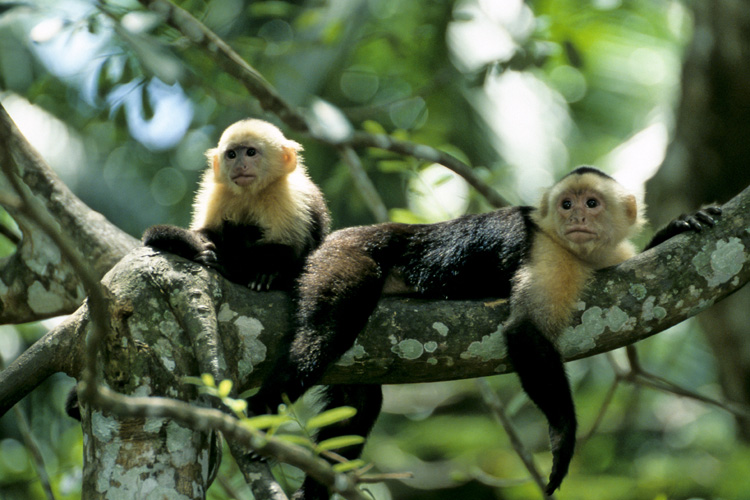

In [6]:
import IPython.display as ipd

ipd.Image('../input/10-monkey-species/training/training/n5/n5021.jpg')

## Step 3: Import the pre- trained model 

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


## Step 4: Add Flattening, hidden and output layers

In [8]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(10, activation='sigmoid')(x)

inception = tf.keras.models.Model(base_model.input, x)
inception.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
inception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Step 5: Train the model

In [10]:
Inception_hist=inception.fit(training_set, validation_data=test_set, epochs=20)

Epoch 1/20
35/35 [==============================] - 59s 2s/step - loss: 5.6332 - accuracy: 0.4278 - val_loss: 0.6467 - val_accuracy: 0.8088
Epoch 2/20
35/35 [==============================] - 33s 953ms/step - loss: 0.5611 - accuracy: 0.8312 - val_loss: 0.5866 - val_accuracy: 0.8346
Epoch 3/20
35/35 [==============================] - 33s 952ms/step - loss: 0.3170 - accuracy: 0.8926 - val_loss: 0.5867 - val_accuracy: 0.8382
Epoch 4/20
35/35 [==============================] - 33s 948ms/step - loss: 0.2732 - accuracy: 0.9074 - val_loss: 0.6708 - val_accuracy: 0.8015
Epoch 5/20
35/35 [==============================] - 33s 947ms/step - loss: 0.2986 - accuracy: 0.9115 - val_loss: 0.5201 - val_accuracy: 0.8493
Epoch 6/20
35/35 [==============================] - 33s 922ms/step - loss: 0.2843 - accuracy: 0.9124 - val_loss: 0.5594 - val_accuracy: 0.8456
Epoch 7/20
35/35 [==============================] - 33s 933ms/step - loss: 0.2229 - accuracy: 0.9256 - val_loss: 0.5879 - val_accuracy: 0.8456
Ep

## Step 6: Train and Test accuracy, loss plots

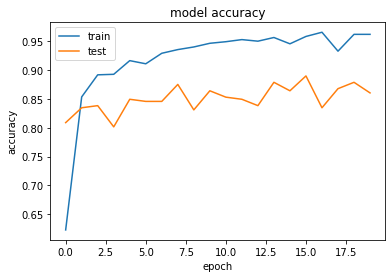

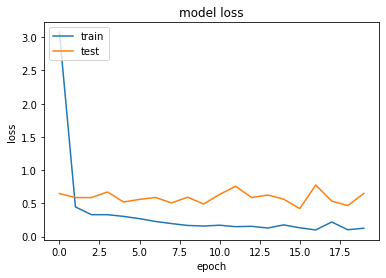

In [11]:
# summarize history for accuracy
plt.plot(Inception_hist.history['accuracy'])
plt.plot(Inception_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(Inception_hist.history['loss'])
plt.plot(Inception_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()